<a href="https://colab.research.google.com/github/Afanasievkostya/portfolio/blob/main/effects_of_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Влияние covid на торговлю.

##Заливка данных

In [ ]:
import pandas as pd
import numpy as np

https://drive.google.com/file/d/1KJX6M6AJ_IvNd0ZShrFnPgmmuaviy2bR/view?usp=sharing

In [ ]:
! gdown --id 1KJX6M6AJ_IvNd0ZShrFnPgmmuaviy2bR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KJX6M6AJ_IvNd0ZShrFnPgmmuaviy2bR
To: /content/effects-of-covid.csv
100% 9.49M/9.49M [00:00<00:00, 63.3MB/s]


In [ ]:
df = pd.read_csv('/content/effects-of-covid.csv')

In [ ]:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


##Предобработка

In [ ]:
df.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Country', 'Commodity',
       'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

In [ ]:
df.columns = ['direction', 'year', 'date', 'weekday', 'country', 'commodity',
       'transport_mode', 'measure', 'value', 'cumulative']


In [ ]:
df.head()

,direction,year,date,weekday,country,commodity,transport_mode,measure,value,cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


In [ ]:
df.isna().mean()

direction         0.0
year              0.0
date              0.0
weekday           0.0
country           0.0
commodity         0.0
transport_mode    0.0
measure           0.0
value             0.0
cumulative        0.0
dtype: float64

In [ ]:
t = df.groupby('direction')['year'].agg(['count','mean'])

In [ ]:
t

,count,mean
direction,,
Exports,80973,2017.982933
Imports,27940,2017.981138
Reimports,2525,2017.980594


In [ ]:
t['count'].sum()

111438

##Анализ влияния covid на экспорт всех стран по годам с 2015г. по 2021г.

In [ ]:
t = df.loc[(df['direction'] == 'Exports')&(df['country'] == 'All')]

In [ ]:
t.head()

,direction,year,date,weekday,country,commodity,transport_mode,measure,value,cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


In [ ]:
df['value'].agg(['mean','median'])

mean      2.905750e+07
median    8.000000e+06
Name: value, dtype: float64

<Axes: >

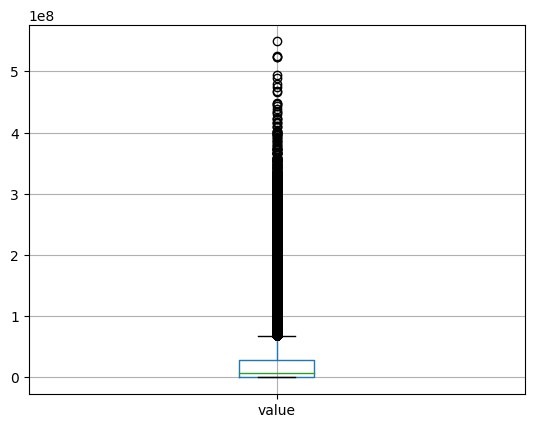

In [ ]:
df.boxplot('value')

In [ ]:
t.groupby(['direction','year'])['value'].agg(['count','mean'])

count          mean
direction year                     
Exports   2015   4745  2.882299e+07
          2016   4758  2.839143e+07
          2017   4745  3.147630e+07
          2018   4745  3.362179e+07
          2019   4745  3.511433e+07
          2020   4758  3.508048e+07
          2021   4537  3.723606e+07

<Axes: xlabel='direction,year'>

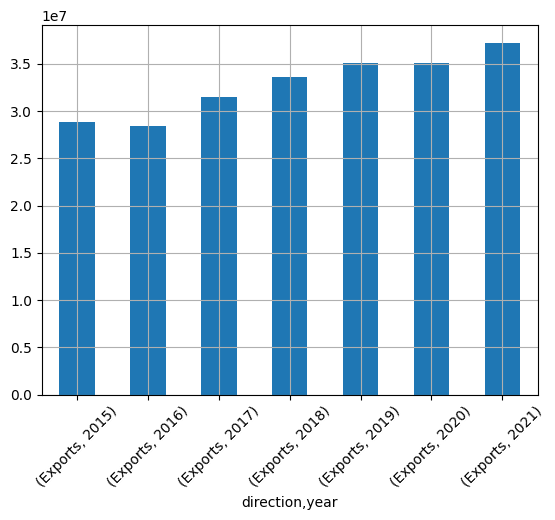

In [ ]:
t.groupby(['direction','year'])['value'].mean().plot(rot=45,ylim=0,grid=True,kind='bar')

<Axes: xlabel='direction,year'>

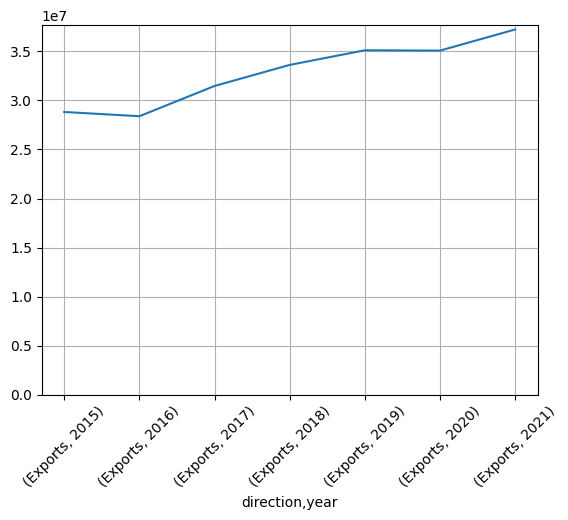

In [ ]:
t.groupby(['direction','year'])['value'].mean().plot(rot=45,ylim=0,grid=True)

В 2015г. до середины 2016г. экспорт немного падал, с середины 2016г. по 2019г. заметно вырос, в 2019г. оставался на прежнем уровне и с 2020г. по 2021г. опять пошёл в рост.

##Анализ влияния covid на импорт всех стран с 2015г. по 2021г.

In [ ]:
t = df.loc[(df['direction'] == 'Imports')&(df['country'] == 'All')]

In [ ]:
t.head()

,direction,year,date,weekday,country,commodity,transport_mode,measure,value,cumulative
11628,Imports,2015,01/01/2015,Thursday,All,All,All,$,50000000,50000000
11629,Imports,2015,02/01/2015,Friday,All,All,All,$,34000000,84000000
11630,Imports,2015,03/01/2015,Saturday,All,All,All,$,25000000,109000000
11631,Imports,2015,04/01/2015,Sunday,All,All,All,$,36000000,145000000
11632,Imports,2015,05/01/2015,Monday,All,All,All,$,178000000,322000000


In [ ]:
df['value'].agg(['mean','median'])

mean      2.905750e+07
median    8.000000e+06
Name: value, dtype: float64

<Axes: >

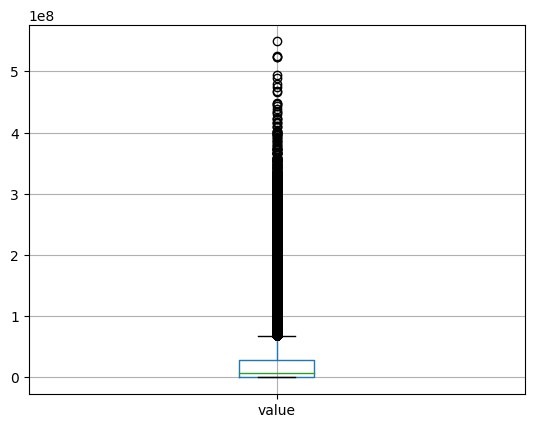

In [ ]:
df.boxplot('value')

In [ ]:
t.groupby(['direction','year'])['value'].agg(['count','mean'])

count          mean
direction year                     
Imports   2015   2190  7.139406e+07
          2016   2195  7.040091e+07
          2017   2189  7.724943e+07
          2018   2190  8.556667e+07
          2019   2190  8.736484e+07
          2020   2196  7.756603e+07
          2021   2093  9.644147e+07

<Axes: xlabel='direction,year'>

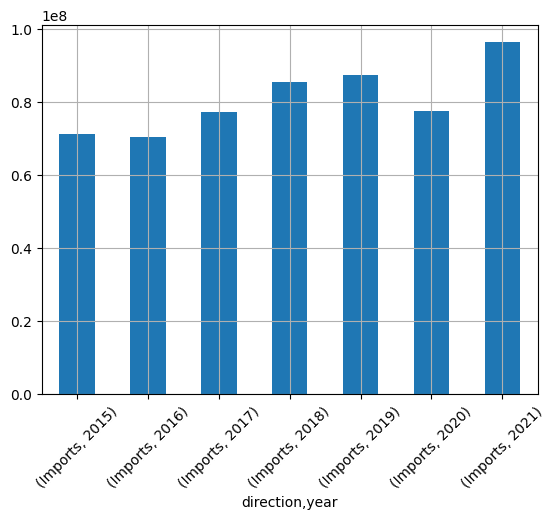

In [ ]:
t.groupby(['direction','year'])['value'].mean().plot(rot=45,ylim=0,grid=True,kind='bar')

<Axes: xlabel='direction,year'>

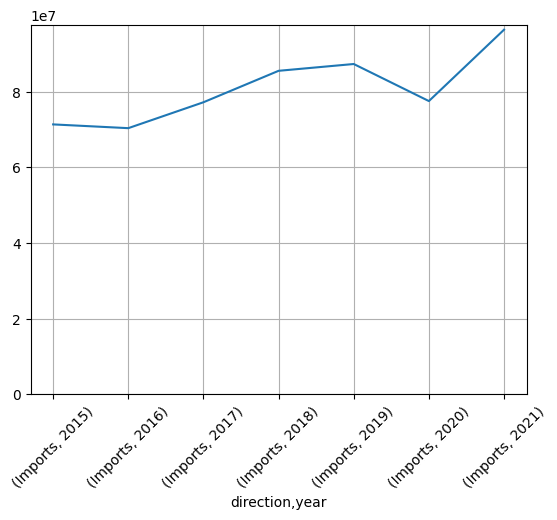

In [ ]:
t.groupby(['direction','year'])['value'].mean().plot(rot=45,ylim=0,grid=True)

В 2015г. импорт немного падал, с 2016г. по 2019г. заметно вырос, в 2019г. резъко упал  и с 2020г. по 2021г. опять пошёл в рост.